# Single Region Fourier via Propagation code

We've been able to get Fourier to work on a single region using code replicating standard FOurier transform, as well as code that does Fourier without the switch from the positive real axis to the whole real axis (the latter allows leaving fields as sum of two exponentials).  Now let's see if the new propagation code can do it.  If it can't, maybe it helps show us where the problem is.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from slab import SlabExact
%matplotlib widget
plt.style.use('dark_background')


In [2]:
A = SlabExact(ns=[1.4], ts=[6e-6], xrefs=[500], symmetric=True)

## Propagation 

In [3]:
def modified_dist(x):
    return (x-1/4) * np.exp(-(x-1/2)**2)  

def odd_modified_dist(x):
    return x * np.exp(-x**2)
    
def normal_dist(x):
    return np.exp(-x**2)

def quadratic_piecewise(x):
    conds = [(x<-.5), ((-.5<=x)*(x<=.5)), (x>.5)]
    funcs = [0, lambda x: .25-x**2, 0]
    return np.piecewise(x, conds, funcs)

def single_piece(x):
    func=[lambda x: np.sin(x)]
    cond = [(-np.inf <= xs)*(xs <= np.inf)]
    return np.piecewise(x, cond, func)


In [4]:
xs = np.linspace(-5,5,2000)

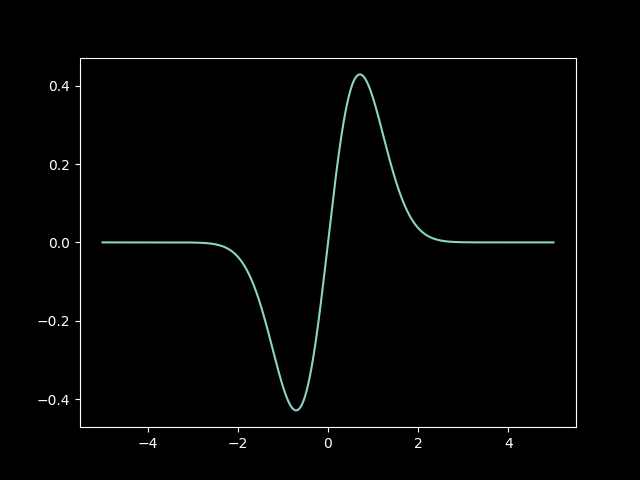

In [6]:
plt.close('all')
plt.plot(xs, odd_modified_dist(xs));

In [7]:
field_type='TE'
sign='+1'
phase=None
exact_args = (field_type, sign, phase)

In [8]:
Propagator = A.propagator()

In [31]:
f0 = odd_modified_dist

In [32]:
P = Propagator(f0=f0, Lx=-4, Rx=4, Nx=70, LZ=-40, RZ=40, NZ=200, field_type=field_type,phase=np.pi/2)

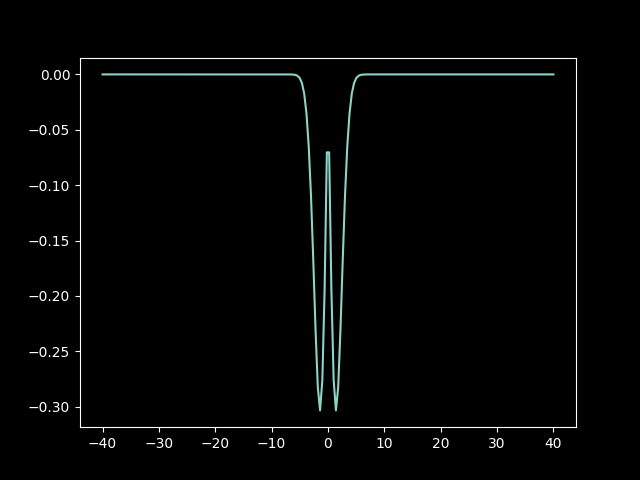

In [33]:
plt.close('all')
plt.plot(P.Zs.real, P.alphas.real);

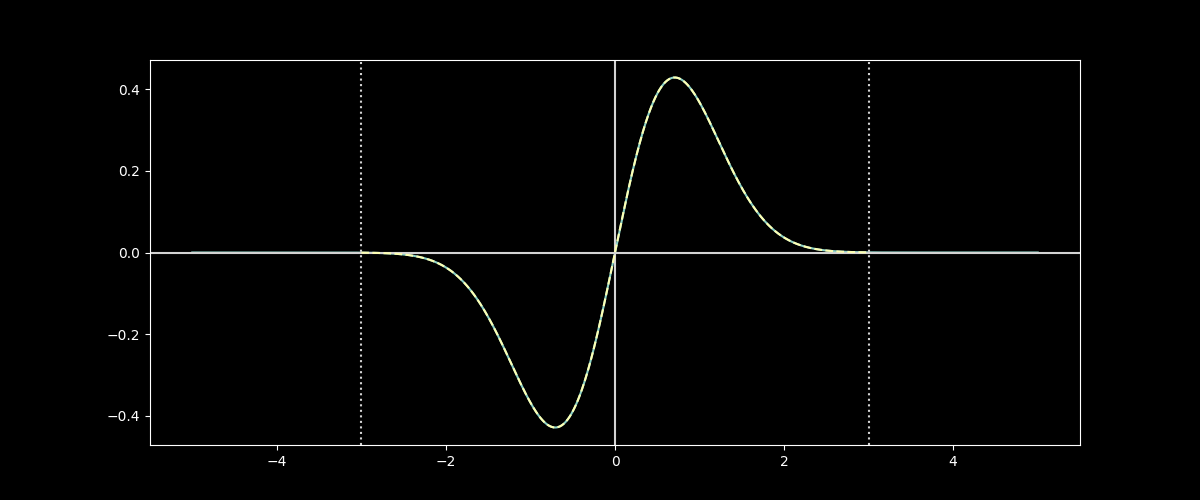

In [34]:
plt.close('all')
A.plot_field_1d(lambda x: 1/2*P.slice_propagate(x), xs=xs)
ax = plt.gca()
A.add_1d_plot(ax,f0, linestyle='--');

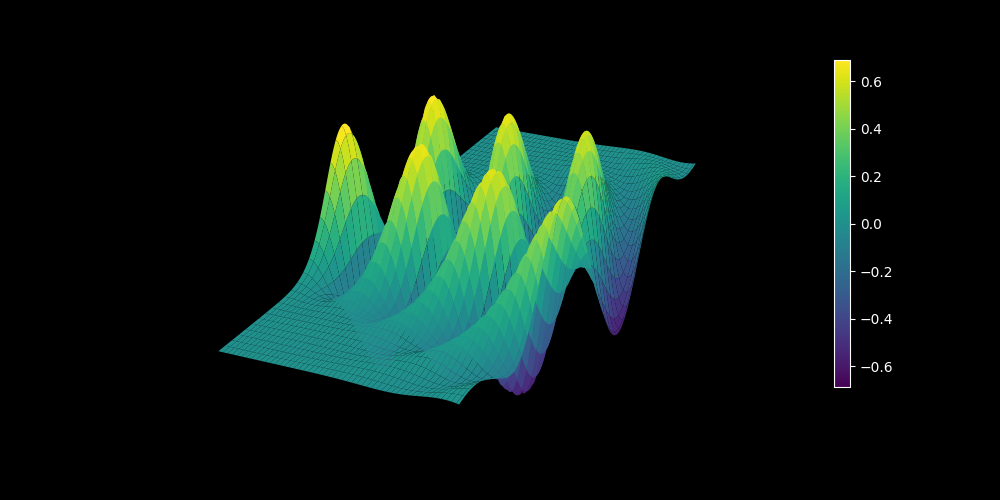

In [39]:
A.plot_field_2d(P.propagate, xs=xs, surface=True, part='real', zoom=2)